## Exercícios

1 - Aplique os algoritmos K-means [1] e AgglomerativeClustering [2] em qualquer dataset que você desejar (recomendação: iris). Compare os resultados utilizando métricas de avaliação de clusteres (completeness e homogeneity, por exemplo) [3].

* [1] http://scikit-learn.org/stable/modules/clustering.html#k-means

* [2] http://scikit-learn.org/0.17/modules/clustering.html#hierarchical-clustering

* [3] http://scikit-learn.org/stable/modules/clustering.html#clustering-evaluation

2 - Qual o valor de K (número de clusteres) você escolheu para a questão anterior? Desenvolva o Método do Cotovelo (não utilizar lib!) e descubra o K mais adequado. Após descobrir, aplique novamente o K-means com o K adequado. 

* Ajuda: atributos do [k-means](http://scikit-learn.org/0.17/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)

3 - Após a questão 2, você aplicou o algoritmo com K apropriado. Refaça o cálculo das métricas de acordo com os resultados de clusters obtidos com a questão anterior e verifique se o resultado melhorou.







In [6]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
dataset = load_iris()
X = dataset.data
y = dataset.target

### 1

In [8]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
predictions = kmeans.predict(X)
reduced_data = decomposition.PCA(n_components=2).fit_transform(X)
reduced_data_df = pd.DataFrame(reduced_data)
reduced_data_df[2] = predictions

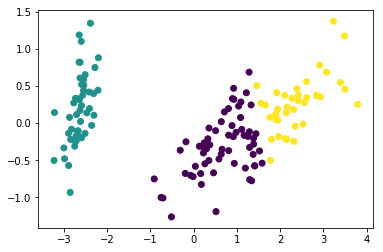

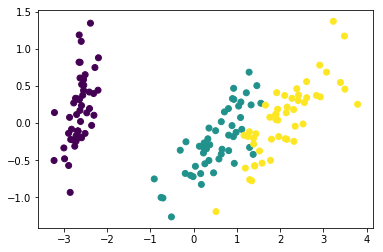

In [9]:
fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=reduced_data_df[2])
plt.show()

fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=y)
plt.show()

In [12]:
agglomerative = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="complete").fit_predict(X)
agglomerativeManhattan = AgglomerativeClustering(n_clusters=3, affinity="manhattan", linkage="complete").fit_predict(X)
agglomerativeCosine = AgglomerativeClustering(n_clusters=3, affinity="cosine", linkage="complete").fit_predict(X)


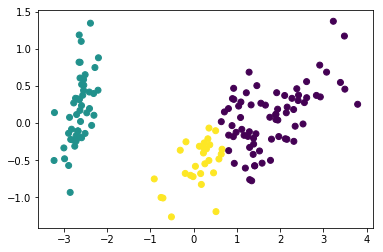

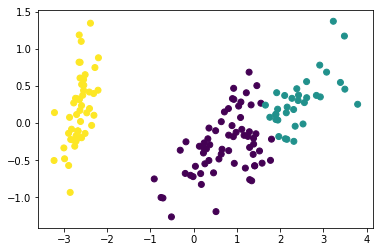

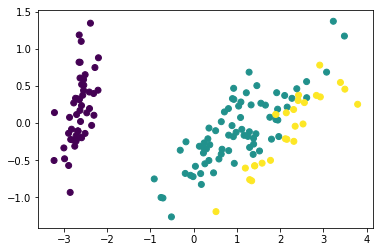

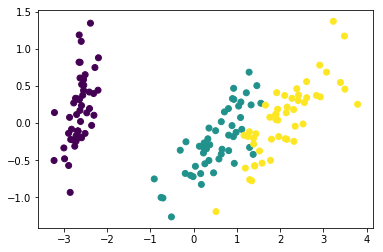

In [13]:
fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=agglomerative)
plt.show()

fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=agglomerativeManhattan)
plt.show()

fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=agglomerativeCosine)
plt.show()

fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=y)
plt.show()

In [15]:
## Comparação
#Kmeans
metric_Kmeans_homo = metrics.homogeneity_score(y, reduced_data_df[2])
metric_Kmeans_comp = metrics.completeness_score(y, reduced_data_df[2]) 

#Agglomerative - Euclidean
metric_AggloEuclidean_homo = metrics.homogeneity_score(y, agglomerative)
metric_AggloEuclidean_comp = metrics.completeness_score(y, agglomerative) 

#Agglomerative - Manhattan
metric_AggloManhattan_homo = metrics.homogeneity_score(y, agglomerativeManhattan)
metric_AggloManhattan_comp = metrics.completeness_score(y, agglomerativeManhattan) 

#Agglomerative - Cosine
metric_AggloCosine_homo = metrics.homogeneity_score(y, agglomerativeCosine)
metric_AggloCosine_comp = metrics.completeness_score(y, agglomerativeCosine) 

print ("K-Means Metrics \n Homogeneity:", metric_Kmeans_homo, "\n Completeness:", metric_Kmeans_comp, "\n")
print ("Agglomerative Clustering Metrics - Euclidean \n Homogeneity:", metric_AggloEuclidean_homo, "\n Completeness:", metric_AggloEuclidean_comp, "\n")
print ("Agglomerative Clustering Metrics - Manhattan \n Homogeneity:", metric_AggloManhattan_homo, "\n Completeness:", metric_AggloManhattan_comp, "\n")
print ("Agglomerative Clustering Metrics - Cosine \n Homogeneity:", metric_AggloCosine_homo, "\n Completeness:", metric_AggloCosine_comp)

K-Means Metrics 
 Homogeneity: 0.751485402199 
 Completeness: 0.764986151449 

Agglomerative Clustering Metrics - Euclidean 
 Homogeneity: 0.700115437096 
 Completeness: 0.745438275302 

Agglomerative Clustering Metrics - Manhattan 
 Homogeneity: 0.778176865951 
 Completeness: 0.803588540623 

Agglomerative Clustering Metrics - Cosine 
 Homogeneity: 0.717058965034 
 Completeness: 0.773421193274


### 2

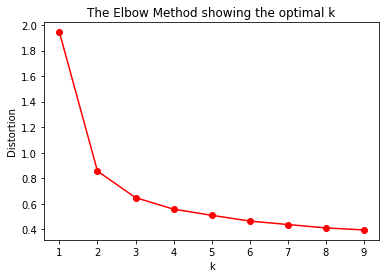

In [16]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

plt.plot(K, distortions, 'ro-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

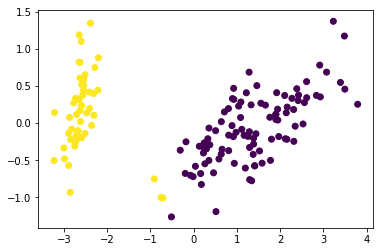

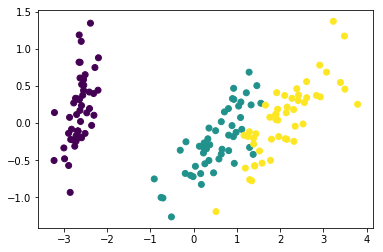

In [17]:
kmeansOptimal = KMeans(n_clusters=2).fit(X)
predictions = kmeansOptimal.predict(X)
fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=predictions)
plt.show()

fig, ax = plt.subplots()
ax.scatter(reduced_data_df[0], reduced_data_df[1], c=y)
plt.show()